# CNA PREP and RESULTS TISSUE CELLS
## Sid Gurajala
## 05/01/2023

## Libraries 

In [1]:
library(patchwork)
library(purrr)
library(dplyr) 
library(tidyverse) 
library(cowplot)
library(singlecellmethods)
library(ggplot2)
library(ggbeeswarm)
library(stringr)

source("/data/srlab/anathan/scripts/scseq_utils.R")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ readr     2.1.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


The following object is masked from ‘package:patchwork’:

    align_plots


Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    

In [2]:
labelfontsize = 20
tickfontsize = 16

figdir = '../../figures/components/'

In [3]:
source("/data/srlab/ssg34/SLE_kidney_v2/scripts/libs/kidney_utils_updated.r")

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


Loading required package: viridisLite

Loading required package: Rcpp



In [20]:
clinical <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/clinical_data_05042023.rds') %>% 
                        rename(Final_Site = Site) %>% select(-sample)

In [ ]:
#all_meta <- readRDS('/data/srlab2/qxiao/AMP-SLE/sc_nuc_data/20230215_Tissue/meta_Tissue_500nGene_1000nUMI_3pctnontargetMTwdoubletandsampleFINAL-02-22-23.rds')
norm <- readRDS('/data/srlab2/qxiao/AMP-SLE/sc_nuc_data/normalized_data_ScNuc_500nGene_1000nUMI_3pctnontargetMTwdoubletandsampleFINAL-8-10-22.rds')

In [ ]:
rawcounts <- readRDS('/data/srlab2/qxiao/AMP-SLE/sc_nuc_data/2022-08-09_ScNuc_cell_QCed_RawCounts.rds')
mito_genes_subset <- c("MT-ND5", "MT-ND6")
percent_mito <- colSums(rawcounts[mito_genes_subset, ]) / colSums(rawcounts) * 100
percent_mito <- data.frame(cell = names(percent_mito), percent.mt = percent_mito)

In [ ]:
saveRDS(percent_mito, '/data/srlab/ssg34/SLE_kidney_v2/data/tissue/percent_mito_from_rawcounts_12072023.rds')

In [1]:
percent_mito <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/tissue/percent_mito_from_rawcounts_12072023.rds')

In [ ]:
kpmp_markers <- read.csv('/data/srlab/ssg34/SLE_kidney_v2/data/tissue/KPMP_markers.csv')

# GLOM

## SUBTYPES

In [1]:
glom_meta <- readRDS('/data/srlab2/qxiao/AMP-SLE/sc_nuc_data/20230215_Tissue/GLOM/2023-06-30_meta_500nGene_1000nUMI_3.rds')

In [ ]:
cluster_center <- glom_meta %>%
                  group_by(hres.0.4) %>%
                  summarise_at(vars(huwotUMAP1, huwotUMAP2), funs(median(., na.rm=TRUE)))
cluster_center <- as.data.frame(cluster_center)

In [ ]:
options(repr.plot.height = 10, repr.plot.width = 10)

ggplot() +
  geom_point(
    data = glom_meta[sample(nrow(glom_meta)), ] %>% filter(dataset == "scRNAseq") %>% 
      select(huwotUMAP1, huwotUMAP2, hres.0.4) %>% 
              mutate(hres.0.4 = as.factor(hres.0.4)), 
    aes(x = huwotUMAP1, y = huwotUMAP2, color = hres.0.4),
    size = 0.75, shape = 20, stroke = 0.0001
  ) +
  ggrepel::geom_label_repel(
    data = cluster_center,
    aes(x = huwotUMAP1, y = huwotUMAP2, 
        label = hres.0.4, color = as.factor(hres.0.4)),
    size = 6,  fontface = "bold",
    box.padding = unit(0.5, "lines"),
    point.padding = unit(0.01, "lines")
  ) +
    ggsci::scale_color_frontiers() +
theme_classic(base_size = 15) +
#scale_x_continuous(limits = c(-10, 15)) +
#scale_y_continuous(limits = c(-12, 15)) +
  theme(
    legend.position = "none",
        #  plot.title = element_text(hjust = 0.5, 
        #                            size = 18, 
        #                            face = "bold"),
          axis.title = element_text(hjust = 0.75, 
                                    size = 20, 
                                    face = "bold"), 
    #     axis.text = element_blank(),
          axis.line = element_blank(),
          axis.ticks = element_blank(),
          panel.border = element_rect(colour = "black", fill=NA, size=1)
) +
    labs(x = "UMAP1", y = "UMAP2") +
    guides(color = guide_legend(ncol = 1, override.aes = list(size = 8)))

ERROR: [1m[33mError[39m in `group_by()`:[22m
[1m[22m[33m![39m Must group by variables found in `.data`.
[31m✖[39m Column `final_annotation` is not found.


In [ ]:
fig.size(10, 12)
#PIP5K1B, ROBO1, PIEZO2, DAAM2, PHTF2, GATA3, POSTN
plot_shuffled_features(glom_meta %>% filter(dataset == "scRNAseq"), 
                       norm, 
                       "DAAM2", pct = 0.95) 
plot_shuffled_features(glom_meta %>% filter(dataset == "snRNAseq"), 
                       norm, 
                       "DAAM2", pct = 0.95) 

In [ ]:
write.csv(glom_de %>% rename(cluster = group), 
          '/data/srlab/ssg34/SLE_kidney_v2/data/tissue/glom_de_wilcox_sc_sn_07242023.csv',
          row.names = FALSE, quote = FALSE)

In [ ]:
glom_de <- read.csv('/data/srlab/ssg34/SLE_kidney_v2/data/tissue/glom_de_wilcox_sc_sn_07242023.csv')

In [ ]:
sc_de <- wilcoxauc(norm[, glom_meta %>% filter(dataset == "scRNAseq") %>% pull(cell)], glom_meta %>% filter(dataset == "scRNAseq") %>% pull(hres.0.4)) 
sn_de <- wilcoxauc(norm[, glom_meta %>% filter(dataset == "snRNAseq") %>% pull(cell)], glom_meta %>% filter(dataset == "snRNAseq") %>% pull(hres.0.4))

In [ ]:
genes <- c(
           extract_broad_genes("TL")) 

In [ ]:
extract_subtype_genes("PEC")

In [ ]:
sc_plot_df <- sc_de %>%  filter(feature %in% genes) %>% 
                    select(group, feature, 
                           logFC, avgExpr, pct_in) %>% ungroup() %>% group_by(feature) %>% 
                    mutate(avgExpr_scaled = scale(avgExpr)) 
sn_plot_df <- sn_de %>%  filter(feature %in% genes) %>% 
                    select(group, feature, 
                           logFC, avgExpr, pct_in) %>% ungroup() %>% group_by(feature) %>% 
                    mutate(avgExpr_scaled = scale(avgExpr)) 

In [ ]:
range(sc_plot_df$avgExpr_scaled)
range(sn_plot_df$avgExpr_scaled)

In [ ]:
fig.size(8, 12)
ggplot(sc_plot_df %>% rename(percent = pct_in,
                             zscore = avgExpr_scaled), 
               aes(x = feature, y = group, 
                   color = zscore, size = percent)) + 
    geom_point() + 
    theme_classic(base_size = 12) + 
    scale_color_gradientn(colors = viridis_pal()(10), limits=c(-1, 2.5), 
                           na.value = "#FDE725FF") + 
    scale_x_discrete(limits = genes) + 
    theme(axis.text.x = element_text(angle = 90),
          axis.text = element_text(face = "bold", size = 15),
          axis.title = element_text(size = 15)) + 
    labs(x = "", y = "")
ggplot(sn_plot_df %>% rename(percent = pct_in,
                             zscore = avgExpr_scaled), 
               aes(x = feature, y = group, 
                   color = zscore, size = percent)) + 
    geom_point() + 
    theme_classic(base_size = 12) + 
    scale_color_gradientn(colors = viridis_pal()(10), limits=c(-1, 2.5), 
                           na.value = "#FDE725FF") + 
    scale_x_discrete(limits = genes) + 
    theme(axis.text.x = element_text(angle = 90),
          axis.text = element_text(face = "bold", size = 15),
          axis.title = element_text(size = 15)) + 
    labs(x = "", y = "")

In [ ]:
fig.size(8, 12)
ggplot(sc_plot_df %>% rename(percent = pct_in,
                             zscore = avgExpr_scaled), 
               aes(x = feature, y = group, 
                   color = zscore, size = percent)) + 
    geom_point() + 
    theme_classic(base_size = 12) + 
    scale_color_gradientn(colors = viridis_pal()(10), limits=c(-1, 2.5), 
                           na.value = "#FDE725FF") + 
    scale_x_discrete(limits = genes) + 
    theme(axis.text.x = element_text(angle = 90),
          axis.text = element_text(face = "bold", size = 15),
          axis.title = element_text(size = 15)) + 
    labs(x = "", y = "")
ggplot(sn_plot_df %>% rename(percent = pct_in,
                             zscore = avgExpr_scaled), 
               aes(x = feature, y = group, 
                   color = zscore, size = percent)) + 
    geom_point() + 
    theme_classic(base_size = 12) + 
    scale_color_gradientn(colors = viridis_pal()(10), limits=c(-1, 2.5), 
                           na.value = "#FDE725FF") + 
    scale_x_discrete(limits = genes) + 
    theme(axis.text.x = element_text(angle = 90),
          axis.text = element_text(face = "bold", size = 15),
          axis.title = element_text(size = 15)) + 
    labs(x = "", y = "")

In [ ]:
ggplot(glom_meta, 
       aes(x = as.factor(hres.0.4), y = as.numeric(doublet_score), fill = dataset)) + 
    geom_boxplot() + theme_classic(base_size = 20) + 
    labs(x = "cluster", y = "scrublet_score") + 
    scale_y_continuous(limits = c(0, 0.4))




ggplot(glom_meta, 
       aes(x = as.factor(hres.0.4), y = log(as.numeric(nCount_RNA)), fill = dataset)) + 
    geom_boxplot() + theme_classic(base_size = 20) +
    labs(x = "cluster", y = "log(Counts Per Cell)")




ggplot(glom_meta,
       aes(x = as.factor(hres.0.4), y = log(as.numeric(nFeature_RNA)), fill = dataset)) + 
    geom_boxplot() + theme_classic(base_size = 20) + 
    labs(x = "cluster", y = "log(Genes Per Cell)")

In [ ]:
fig.size(8, 8)

plot_dist <- function(input_df, norm, feature)  {
    plot_df <- input_df %>% mutate(Exp = norm[feature, input_df$cell])
    p <- ggplot(plot_df, aes(x = hres.0.2, y = Exp, fill = dataset)) + 
            geom_boxplot() + 
            theme_classic(base_size = 20) + 
            labs(x = "Cluster", y = "Normalized Expression", title = feature) +
            theme(plot.title = element_text(size = 25, face = "bold.italic", hjust = 0.5))
    return(p)
}
#PIP5K1B, ROBO1, PIEZO2, DAAM2, PHTF2, GATA3, POSTN
plot_dist(glom_meta, norm, "SLC12A1")
plot_dist(glom_meta, norm, "TRPM6")
plot_dist(glom_meta, norm, "ADGRL3")

## RECLUSTER

In [ ]:
celltype <- 'GLOM'

path = '/data/srlab2/qxiao/AMP-SLE/sc_nuc_data/'

nGenepar <- 500
nUMIpar <- 1000
pctmt <- 3

In [ ]:
glom_meta <- glom_meta %>% filter(!hres.0.4 %in% c(2, 4, 6, 7, 8))

In [ ]:
genes_exclude <- c(grep("^MT-|^RPL|^RPS|MALAT1|MIR-", row.names(glom_norm), value = TRUE), Seurat::cc.genes$s.genes, Seurat::cc.genes$g2m.genes) 

In [ ]:
sc_meta <- glom_meta %>% filter(dataset == "scRNAseq")
sn_meta <- glom_meta %>% filter(dataset == "snRNAseq")

In [ ]:
glom_norm <- norm[, glom_meta$cell]

In [ ]:
sc_norm <- glom_norm[, sc_meta$cell]
sn_norm <- glom_norm[, sn_meta$cell]

In [ ]:
sc_threshold_genes <- sc_norm[rownames(sc_norm[rowMeans(sc_norm) >= .01, ]), ]
sn_threshold_genes <- sn_norm[rownames(sn_norm[rowMeans(sn_norm) >= .01, ]), ]

In [ ]:
sc_threshold_genes <- sc_threshold_genes[ -which( rownames(sc_threshold_genes) %in% genes_exclude ) ,]
sn_threshold_genes <- sn_threshold_genes[ -which( rownames(sn_threshold_genes) %in% genes_exclude ) ,]

In [ ]:
sc_samples_25 <- sc_meta %>% group_by(sample) %>% tally() %>% filter(n > 25) %>% pull(sample)

sc_threshold_samples <- sc_threshold_genes[, sc_meta %>% filter(sample %in% sc_samples_25) %>% pull(cell)]


sn_samples_25 <- sn_meta %>% group_by(sample) %>% tally() %>% filter(n > 25) %>% pull(sample)

sn_threshold_samples <- sn_threshold_genes[, sn_meta %>% filter(sample %in% sn_samples_25) %>% pull(cell)]

In [ ]:
sc_var_genes_1000_raw <- vargenes_vst(object = sc_threshold_samples, groups = sc_meta %>% filter(sample %in% sc_samples_25) %>% pull(sample), topn = 500)

sn_var_genes_1000_raw <- vargenes_vst(object = sn_threshold_samples, groups = sn_meta %>% filter(sample %in% sn_samples_25) %>% pull(sample), topn = 500)

In [ ]:
saveRDS(sc_var_genes_1000_raw, paste(path, '20230215_Tissue/', 
                                     celltype,
                                     '/',
                                     Sys.Date(),
                                     '_',
                                     "variable_genes_500_perSample_",
                                     "sc_",
                                     nGenepar,
                                    "nGene_",
                                     nUMIpar,
                                     "nUMI_",
                                     pctmt,
                                     ".rds",
                            sep = ""),
        version = 2
       )


saveRDS(sn_var_genes_1000_raw, paste(path, '20230215_Tissue/', 
                                     celltype,
                                     '/',
                                     Sys.Date(),
                                     '_',
                                     "variable_genes_500_perSample_",
                                     "sn_",
                                     nGenepar,
                                    "nGene_",
                                     nUMIpar,
                                     "nUMI_",
                                     pctmt,
                                     ".rds",
                            sep = ""),
        version = 2
       )

In [ ]:
inter_var <- intersect(sc_var_genes_1000_raw, sn_var_genes_1000_raw) 

vargenes_df <- inter_var

length( vargenes_df )

In [ ]:
#rm(sc_norm, sn_norm, sc_meta, sn_meta)

In [ ]:
glom_scaled <- glom_norm[ vargenes_df,] %>% ScaleDataSeurat() 

In [ ]:
table(glom_meta$dataset)
y <- factor(glom_meta$dataset)
weights <- as.numeric((1 / prop.table(table(y)))[y]) / nlevels(y)

In [ ]:
temp <- Matrix::Matrix(glom_scaled, sparse = TRUE)


pca_res <- weighted_pca(temp, weights, rownames(temp), 20, TRUE, 10)#$embeddings

In [ ]:
saveRDS(pca_res, paste0(path, '20230215_Tissue/', 
                                     celltype,
                                     '/',
                                     Sys.Date(),
                                     '_',
                        '20weightedPCA_object.rds'
))

In [ ]:
pca_res <- pca_res$embeddings 

umap_object <- uwot::umap(
    X = pca_res[,1:20],
    ret_extra = c('nn', 'fgraph', 'model')
) 
glom_meta$uwotUMAP1 <- umap_object$embedding[, 1]
glom_meta$uwotUMAP2 <- umap_object$embedding[, 2]

In [ ]:
saveRDS(umap_object, paste(path, '20230215_Tissue/', 
                                     celltype,
                                     '/',
                                     Sys.Date(),
                                     '_',

                            "umap_",
                            nGenepar,
                            "nGene_",
                            nUMIpar,
                            "nUMI_",
                            pctmt,
                            ".rds",
                            sep = "")
)

In [ ]:
glom_meta <- glom_meta %>% select( -c(grep("hres", colnames(glom_meta)), 
                         grep("hPC", colnames(glom_meta)),
                          huwotUMAP1, huwotUMAP2))

In [ ]:
saveRDS(glom_meta, paste(path, '20230215_Tissue/', 
                                     celltype,
                                     '/',
                                     Sys.Date(),
                                     '_',
                            "meta_",
                            nGenepar,
                            "nGene_",
                            nUMIpar,
                            "nUMI_",
                            pctmt,
                            ".rds",
                            sep = "")
)

In [ ]:
library(harmony)

harmony <- HarmonyMatrix(pca_res[,1:20], glom_meta, vars_use = c("sample", "processing.batch", "Site", 'dataset'), theta = c(1,0,0,1),
                         # lambda = 1, 
#                          tau = 0, 
                          epsilon.cluster = -Inf,
                          epsilon.harmony = -Inf,
                         sigma = 0.15,
                         max.iter.cluster = 50,
                         max.iter.harmony = 20,
                         plot_convergence = TRUE,
                             npcs = 20,
                            do_pca = F,
                            weights = weights)

colnames(harmony) <-  c("hPC-1", "hPC-2", "hPC-3", "hPC-4",
                      "hPC-5", "hPC-6", "hPC-7", "hPC-8",
                      "hPC-9", "hPC-10", "hPC-11", "hPC-12",
                      "hPC-13", "hPC-14", "hPC-15", "hPC-16",
                      "hPC-17", "hPC-18", "hPC-19", "hPC-20")

In [ ]:
harmony <- readRDS(paste(path, '20230215_Tissue/', 
                                     celltype,
                                     '/2023-11-03_harmony_',
                            nGenepar,
                            "nGene_",
                            nUMIpar,
                            "nUMI_",
                            pctmt,
                            ".rds",
                            sep = "")
       )



humap_object <- uwot::umap(
    X = harmony[,1:20],
    ret_extra = c('nn', 'fgraph', 'model')
) 

In [ ]:
saveRDS(humap_object, paste(path, '20230215_Tissue/', 
                                     celltype,
                                     '/2023-11-03_humap_',
                            nGenepar,
                            "nGene_",
                            nUMIpar,
                            "nUMI_",
                            pctmt,
                            ".rds",
                            sep = "")
       )

In [ ]:
glom_meta$huwotUMAP1 <- humap_object$embedding[, 1]
glom_meta$huwotUMAP2 <- humap_object$embedding[, 2]
glom_meta <- cbind(glom_meta, harmony[, 1:20])

In [ ]:
saveRDS(glom_meta, paste(path, '20230215_Tissue/', 
                                     celltype,
                                     '/',
                                     Sys.Date(),
                                     '_',
                            "meta_",
                            nGenepar,
                            "nGene_",
                            nUMIpar,
                            "nUMI_",
                            pctmt,
                            ".rds",
                            sep = "")
)
                           
saveRDS(harmony, paste(path, '20230215_Tissue/', 
                                     celltype,
                                     '/',
                                     Sys.Date(),
                                     '_',
                            "harmony_",
                            nGenepar,
                            "nGene_",
                            nUMIpar,
                            "nUMI_",
                            pctmt,
                            ".rds",
                            sep = "")
       )

#rm(pca_res)
#rm(meta)
#rm(harmony)

In [ ]:
glom_meta <- readRDS(paste0(path, '20230215_Tissue/', 
                                     celltype,
                                     '/2023-11-03_meta_500nGene_1000nUMI_3.rds'))

In [ ]:
humap_object <- readRDS(paste(path, '20230215_Tissue/', 
                                     celltype,
                                     '/2023-11-03_humap_',
                            nGenepar,
                            "nGene_",
                            nUMIpar,
                            "nUMI_",
                            pctmt,
                            ".rds",
                            sep = "")
       )

In [ ]:
resolution_list <- c(0.1, 0.2, 0.3, 0.4, 0.6, 0.8, 1.2, 1.6, 2.0)
ids_ref_cca <- Reduce(cbind, mclapply(resolution_list, function(res_use) {
    Seurat:::RunModularityClustering(SNN = humap_object$fgraph, modularity = 1, 
        resolution = res_use, algorithm = 1, n.start = 20, 
        n.iter = 20, random.seed = 100, print.output = FALSE, 
        temp.file.location = NULL, edge.file.name = NULL)
}, mc.preschedule = FALSE, mc.cores = min(20, length(resolution_list))))
gc()
colnames(ids_ref_cca) <- sprintf("hres.%.2f", resolution_list)

In [ ]:
glom_meta <- glom_meta %>% select(-grep("hres|huwotUMAP", colnames(glom_meta))) %>% 
                    cbind(ids_ref_cca %>% data.frame() %>% mutate(across(where(is.numeric), as.factor)))

In [ ]:
glom_meta <- glom_meta %>% cbind(data.frame(huwotUMAP1 = humap_object$embedding[, 1],
                                            huwotUMAP2 = humap_object$embedding[, 2]))

In [ ]:
glom_meta <- glom_meta %>% filter(hres.0.20 != 4)
glom_meta$hres.0.20[glom_meta$hres.0.20 == 5] <- 4

In [ ]:
saveRDS(glom_meta, paste0(path, '20230215_Tissue/', 
                                     celltype,
                                     '/2023-11-22_meta_500nGene_1000nUMI_3.rds'))

## SUBTYPING PART 2

In [ ]:
celltype <- 'GLOM'
path = '/data/srlab2/qxiao/AMP-SLE/sc_nuc_data/'
glom_meta <- readRDS(paste0(path, '20230215_Tissue/', 
                                     celltype,
                                     '/2023-11-22_meta_500nGene_1000nUMI_3.rds'))

In [ ]:
final_annotation = data.frame("hres.0.20" = factor(seq(0, 4)),
                              "final_annotation" = c("GLOM0. BCAMhigh AKAP12high PEC",
                                                     "GLOM1. SDK1high HDAC9high PEC",
                                                     "GLOM2. Podocyte", 
                                                     "GLOM3. CXCL14high MMP7high PEC",
                                                     "GLOM4. Proliferating"))

In [ ]:
glom_meta <- glom_meta %>% left_join(final_annotation)

In [ ]:
glom_meta <- glom_meta %>% left_join(percent_mito)

In [ ]:
saveRDS(glom_meta %>% select(-c(Annot.separate, predicted_broad, predicted_fine)),
        '/data/srlab/ssg34/SLE_kidney_v2/data/tissue/glom_meta_qcd_harmony_umap_clusternames_11302023.rds')

In [ ]:
glom_norm <- norm[, glom_meta$cell]

In [ ]:
saveRDS(glom_norm, '/data/srlab/ssg34/SLE_kidney_v2/data/tissue/GLOM_qcd_norm_12072023.rds')

### Cluster UMAPs

In [4]:
glom_norm <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/tissue/GLOM_qcd_norm_12072023.rds')
glom_meta <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/tissue/glom_meta_qcd_harmony_umap_clusternames_11302023.rds')

In [5]:
qcd_norm = glom_norm

In [6]:
qcd_meta <- glom_meta
qcd_meta <- qcd_meta %>% mutate(new_cluster_number = hres.0.20)

In [31]:
sn_control <- qcd_meta %>% filter(dataset == "snRNAseq", Type == "Control") %>% 
                group_by(new_cluster_number) %>% 
                summarize(samples = length(unique(sample)),
                          ncells = length(unique(cell))) %>% 
                mutate(sn_control = paste0(samples, " (", ncells, ")")) %>% select(new_cluster_number, sn_control)
sn_LN <- qcd_meta %>% filter(dataset == "snRNAseq", Type == "LN") %>% 
                group_by(new_cluster_number) %>% 
                summarize(samples = length(unique(sample)),
                          ncells = length(unique(cell))) %>% 
                mutate(sn_LN = paste0(samples, " (", ncells, ")")) %>% select(new_cluster_number, sn_LN)
sc_control <- qcd_meta %>% filter(dataset == "scRNAseq", Type == "Control") %>% 
                group_by(new_cluster_number) %>% 
                summarize(samples = length(unique(sample)),
                          ncells = length(unique(cell))) %>% 
                mutate(sc_control = paste0(samples, " (", ncells, ")")) %>% select(new_cluster_number, sc_control)
sc_LN <- qcd_meta %>% filter(dataset == "scRNAseq", Type == "LN") %>% 
                group_by(new_cluster_number) %>% 
                summarize(samples = length(unique(sample)),
                          ncells = length(unique(cell))) %>% 
                mutate(sc_LN = paste0(samples, " (", ncells, ")")) %>% select(new_cluster_number, sc_LN)
merged <- sc_LN %>% left_join(sc_control) %>% left_join(sn_LN) %>% left_join(sn_control)
merged[is.na(merged)] <- "0 (0)"


Joining, by = "new_cluster_number"
Joining, by = "new_cluster_number"
Joining, by = "new_cluster_number"


In [ ]:
write.csv(merged, '/data/srlab/ssg34/SLE_kidney_v2/data/tissue/GLOM_summary_04152024.csv', quote = FALSE, row.names = FALSE)

In [13]:
qcd_meta <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/tissue/glom_meta_qcd_harmony_umap_clusternames_11302023.rds')
qcd_meta <- qcd_meta %>% mutate(new_cluster_number = hres.0.20)

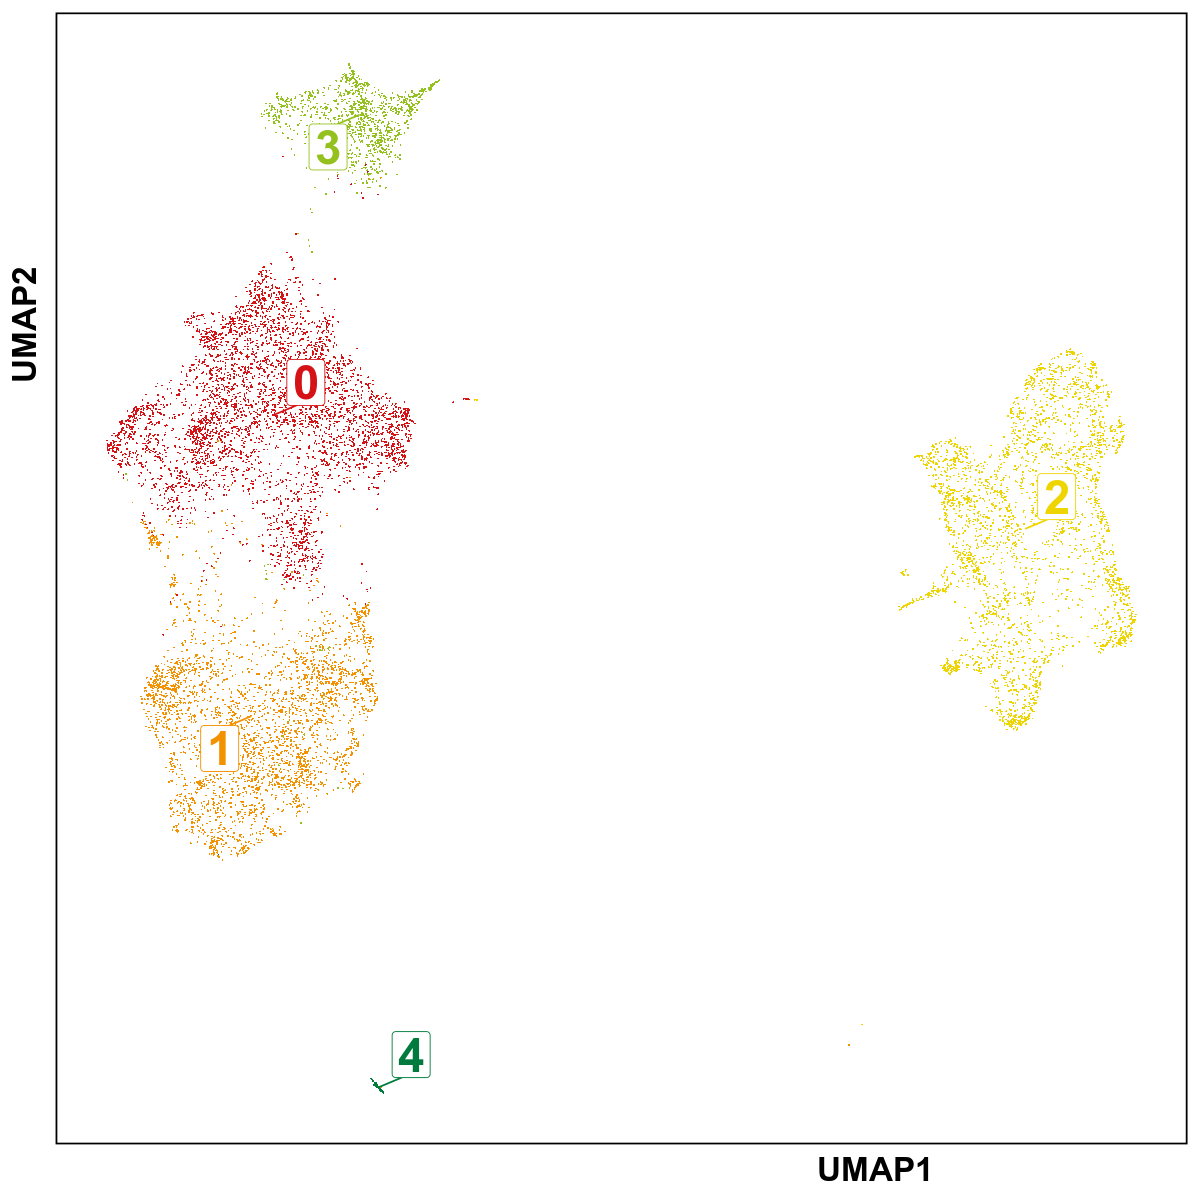

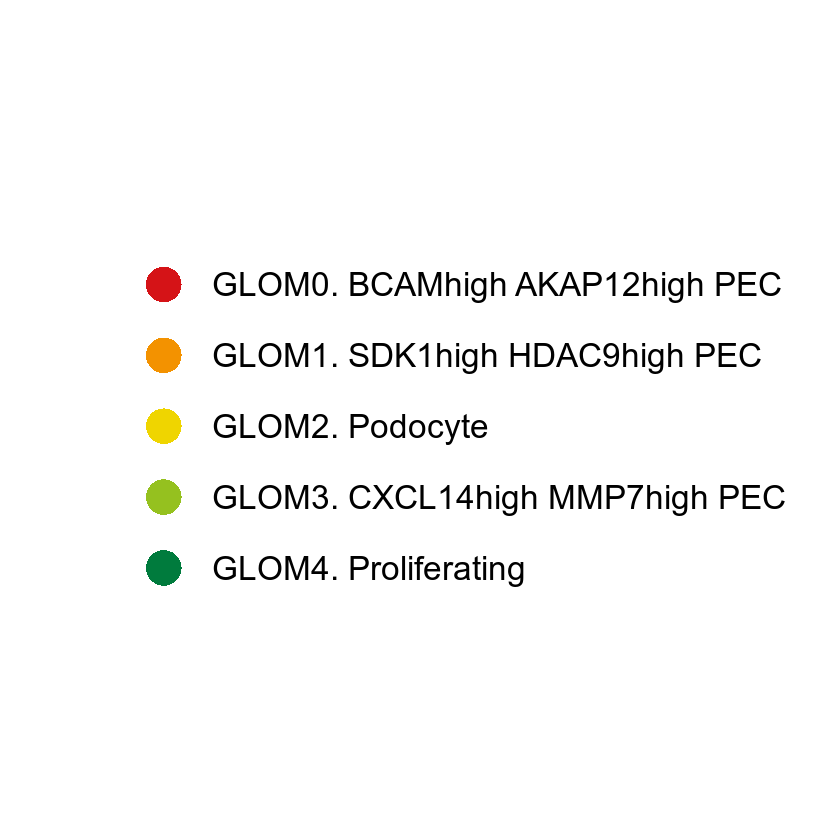

In [19]:
options(warn=-1)
cluster_center <- qcd_meta %>%
                  group_by(new_cluster_number, final_annotation) %>%
                  summarise_at(vars(huwotUMAP1, huwotUMAP2), funs(median(., na.rm=TRUE)))
cluster_center <- as.data.frame(cluster_center)

options(repr.plot.height = 9, repr.plot.width = 18)
p <- ggplot() +
      geom_point(
        data = qcd_meta[sample(nrow(glom_meta)), ] %>% 
          select(huwotUMAP1, huwotUMAP2, new_cluster_number, final_annotation) %>% 
                  mutate(final_annotation = factor(final_annotation, 
                                                   levels = cluster_center$final_annotation)),
        aes(x = huwotUMAP1, y = huwotUMAP2, color = final_annotation),
          size = 0.75, shape = 20, stroke = 0.0001) +
      ggrepel::geom_label_repel(
        data = cluster_center,
        aes(x = huwotUMAP1, y = huwotUMAP2, 
            label = new_cluster_number, color = as.factor(final_annotation)),
        size = 10,  fontface = "bold",
        box.padding = unit(0.5, "lines"),
        point.padding = unit(0.01, "lines"),
        show.legend = FALSE
      ) +
    ggsci::scale_color_frontiers() +
    theme_classic(base_size = 15) +
      theme(
        legend.position = "right",
            #  plot.title = element_text(hjust = 0.5, 
            #                            size = 18, 
            #                            face = "bold"),
              axis.title = element_text(hjust = 0.75, 
                                        size = 20, 
                                        face = "bold"), 
              axis.text = element_blank(),
              axis.line = element_blank(),
              axis.ticks = element_blank(),
              panel.border = element_rect(colour = "black", fill=NA, size=1),
              legend.text = element_text(size = 20),
              legend.title = element_blank()
          
    ) +
    theme(text=element_text(family="Arial")) + 
        labs(x = "UMAP1", y = "UMAP2") +
        guides(color = guide_legend(ncol = 1, override.aes = list(size = 15)))
legend <- cowplot::get_legend(p)
p <- p + theme(legend.position = "none")
legend <- cowplot::plot_grid(legend)
cowplot::save_plot("/data/srlab/ssg34/SLE_kidney_v2/figures/figure2/figure2h.png",
       p,
       base_height = 10,
       base_width = 10)
cowplot::save_plot("/data/srlab/ssg34/SLE_kidney_v2/figures/figure2/figure2h-legend.png",
       legend,
       base_height = 7,
       base_width = 7)
fig.size(10, 10)
p
fig.size(7, 7)
legend
options(warn=0)

### Single Cell UMAP, Single Nuclear UMAP

In [7]:
qcd_meta = qcd_meta %>% rename(hUMAP1 = huwotUMAP1, hUMAP2 = huwotUMAP2)

Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


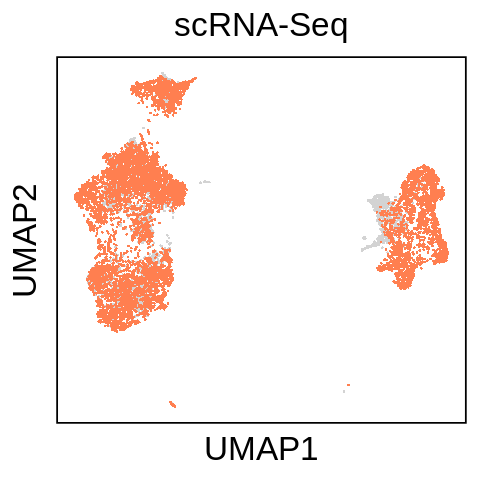

In [8]:
umap_plot = ggplot() +
  geom_point(
    data=select(qcd_meta, c(hUMAP1, hUMAP2, dataset)),
    aes(x = hUMAP1, y = hUMAP2),
    size = 0.75, stroke = 0.0001, color = "lightgrey"
  ) + 
  geom_point(
    data=qcd_meta %>% filter(dataset == "scRNAseq") %>% select(hUMAP1, hUMAP2),
    aes(x = hUMAP1, y = hUMAP2),
    size = 0.75, stroke = 0.0001, color = "coral"
  ) +
theme_classic(base_size = tickfontsize) +
  theme(
    legend.position = "none",
         plot.title = element_text(size = labelfontsize, hjust = 0.5),
          axis.title = element_text(size = labelfontsize), 
          axis.text = element_blank(),
          axis.line = element_blank(),
          axis.ticks = element_blank(),
          panel.border = element_rect(colour = "black", fill=NA, size=1),
          text=element_text(family="Arial")
  ) + labs(x = "UMAP1", y = "UMAP2", title = 'scRNA-Seq') 


outplot = umap_plot

height = 4
width = 4
fig.size(height, width)
outplot

ggsave(paste0(figdir, 'glom_umap_sc.png'), plot = outplot,  
       height = height, width = width, dpi = 500)
ggsave(paste0(figdir, 'glom_umap_sc.pdf'), plot = outplot,  
       height = height, width = width, dpi = 500, device = cairo_pdf)


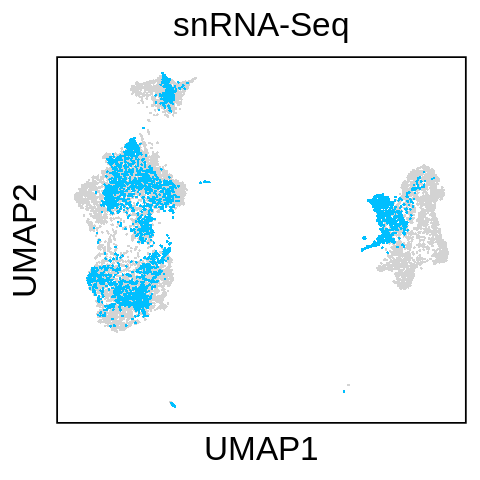

In [9]:
umap_plot = ggplot() +
  geom_point(
    data=select(qcd_meta, c(hUMAP1, hUMAP2, dataset)),
    aes(x = hUMAP1, y = hUMAP2),
    size = 0.75, stroke = 0.0001, color = "lightgrey"
  ) + 
  geom_point(
    data=qcd_meta %>% filter(dataset == "snRNAseq") %>% select(hUMAP1, hUMAP2),
    aes(x = hUMAP1, y = hUMAP2),
    size = 0.75, stroke = 0.0001, color = "deepskyblue"
  ) +
theme_classic(base_size = tickfontsize) +
  theme(
    legend.position = "none",
         plot.title = element_text(size = labelfontsize, hjust = 0.5),
          axis.title = element_text(size = labelfontsize), 
          axis.text = element_blank(),
          axis.line = element_blank(),
          axis.ticks = element_blank(),
          panel.border = element_rect(colour = "black", fill=NA, size=1),
          text=element_text(family="Arial")
  ) + labs(x = "UMAP1", y = "UMAP2", title = 'snRNA-Seq') 


outplot = umap_plot

height = 4
width = 4
fig.size(height, width)
outplot

ggsave(paste0(figdir, 'glom_umap_sn.png'), plot = outplot,  
       height = height, width = width, dpi = 500)
ggsave(paste0(figdir, 'glom_umap_sn.pdf'), plot = outplot,  
       height = height, width = width, dpi = 500, device = cairo_pdf)

### Marker Gene UMAPs

In [13]:
markers = c('PODXL', 'VCAM1', 'CFH')

In [14]:
qcd_scaled = qcd_norm[markers, ] %>% scaleData
vmax = qcd_scaled %>% quantile(.95)
vmin = qcd_scaled %>% quantile(.05)

In [15]:
p = plot_shuffled_features(qcd_meta, qcd_scaled, markers[1], pt_size = 1, max.cutoff = vmax,
                          min.cutoff = vmin)
p1 = p + theme(legend.text = element_text(size = labelfontsize-2),
                legend.title = element_text(size = labelfontsize),
                plot.title = element_text(hjust = 0.5, size = labelfontsize),
               theme(text=element_text(family="Arial")),
              legend.position = "none") + labs(x = 'UMAP1', y = 'UMAP2')

p = plot_shuffled_features(qcd_meta, qcd_scaled, markers[2], pt_size = 1, max.cutoff = vmax,
                          min.cutoff = vmin)
p2 = p + theme(legend.text = element_text(size = labelfontsize-2),
                legend.title = element_text(size = labelfontsize),
                plot.title = element_text(hjust = 0.5, size = labelfontsize),
               theme(text=element_text(family="Arial")),
              legend.position = "none") + labs(x = 'UMAP1', y = 'UMAP2')

p = plot_shuffled_features(qcd_meta, qcd_scaled, markers[3], pt_size = 1, max.cutoff = vmax,
                          min.cutoff = vmin)
p3 = p + theme(legend.text = element_text(size = labelfontsize-2),
                legend.title = element_text(size = labelfontsize),
                plot.title = element_text(hjust = 0.5, size = labelfontsize),
               theme(text=element_text(family="Arial")),
              legend.position = "none") + labs(x = 'UMAP1', y = 'UMAP2')

# p = plot_shuffled_features(qcd_meta, qcd_scaled, markers[4], pt_size = 1, max.cutoff = vmax,
#                           min.cutoff = vmin)
# p4 = p + theme(legend.text = element_text(size = labelfontsize-2),
#                 legend.title = element_text(size = labelfontsize),
#                 plot.title = element_text(hjust = 0.5, size = labelfontsize),
#                theme(text=element_text(family="Arial")),
#               legend.position = "none") + labs(x = 'UMAP1', y = 'UMAP2')

umap_legend = get_legend(p +theme(legend.text = element_text(size = labelfontsize-2),
                legend.title = element_text(size = labelfontsize),
                plot.title = element_text(hjust = 0.5, size = labelfontsize),
                theme(text=element_text(family="Arial"))))
umap_legend = cowplot::plot_grid(umap_legend) 

Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”


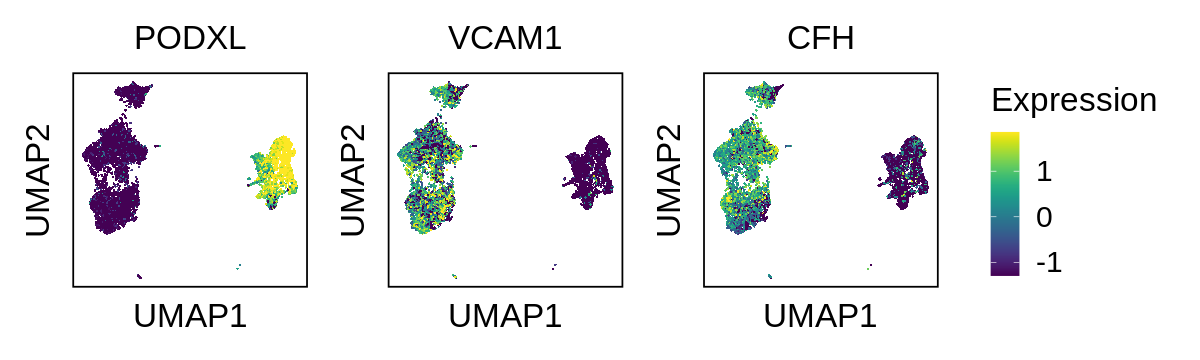

In [17]:
height = 3
width = 10
fig.size(height, width)

outplot = p1 + p2 + p3 + umap_legend + plot_layout(nrow = 1)
outplot

ggsave(paste0(figdir, 'glom_umap_markers.png'), plot = outplot,  
       height = height, width = width, dpi = 500)
ggsave(paste0(figdir, 'glom_umap_markers.pdf'), plot = outplot,  
       height = height, width = width, dpi = 500, device = cairo_pdf)

### Gene Heatmaps

In [19]:
marker.genes <- c("VCAM1", "CFH", "ALDH1A2",
           "BCAM", "AKAP12",
           "SDK1", "HDAC9",
           "PODXL", "NPHS2", "WT1",
           "CXCL14", "MMP7",
           "CENPF", "PCNA", "DIAPH3")
annotation.order = c("GLOM0. BCAMhigh AKAP12high PEC",
                     "GLOM1. SDK1high HDAC9high PEC",
                     "GLOM2. Podocyte", 
                     "GLOM3. CXCL14high MMP7high PEC",
                     "GLOM4. Proliferating")

In [21]:
marker_genes = marker.genes

In [18]:
wilcox_sn <- wilcoxauc(qcd_norm[, qcd_meta %>% filter(dataset == 'snRNAseq') %>% pull(cell)], 
                       qcd_meta %>% filter(dataset == 'snRNAseq') %>% pull(final_annotation))
wilcox_sc <- wilcoxauc(qcd_norm[, qcd_meta %>% filter(dataset == 'scRNAseq') %>% pull(cell)], 
                       qcd_meta %>% filter(dataset == 'scRNAseq') %>% pull(final_annotation))

In [22]:
sc_plot_df <- wilcox_sc %>%  filter(feature %in% marker_genes) %>% 
                    select(group, feature, 
                           logFC, avgExpr, pct_in) %>% ungroup() %>% group_by(feature) %>% 
                    mutate(avgExpr_scaled = scale(avgExpr)) 
sn_plot_df <- wilcox_sn %>%  filter(feature %in% marker_genes) %>% 
                    select(group, feature, 
                           logFC, avgExpr, pct_in) %>% ungroup() %>% group_by(feature) %>% 
                    mutate(avgExpr_scaled = scale(avgExpr)) 

In [23]:
setdiff(sc_plot_df$group, annotation.order)

character(0)

In [24]:
title = 'scRNA-seq'
dat_all = sc_plot_df %>% rename(percent = pct_in, zscore = avgExpr_scaled) 

dat = dat_all %>% pivot_wider(id_cols = 'feature', names_from = 'group', 
                    values_from = 'zscore') %>% as.data.frame
rownames(dat) = dat$feature
dat = dat %>% select(-feature)
row.order = marker_genes
col.order = annotation.order
# row.order = rownames(dat)[hclust(dist(dat))$order]
# col.order = colnames(dat)[hclust(dist(t(dat)))$order]
dat = dat_all
dat$group = factor(dat$group, levels = col.order)
dat$feature = factor(dat$feature, levels = row.order)

# dat = dat[!is.na(dat$group), ]

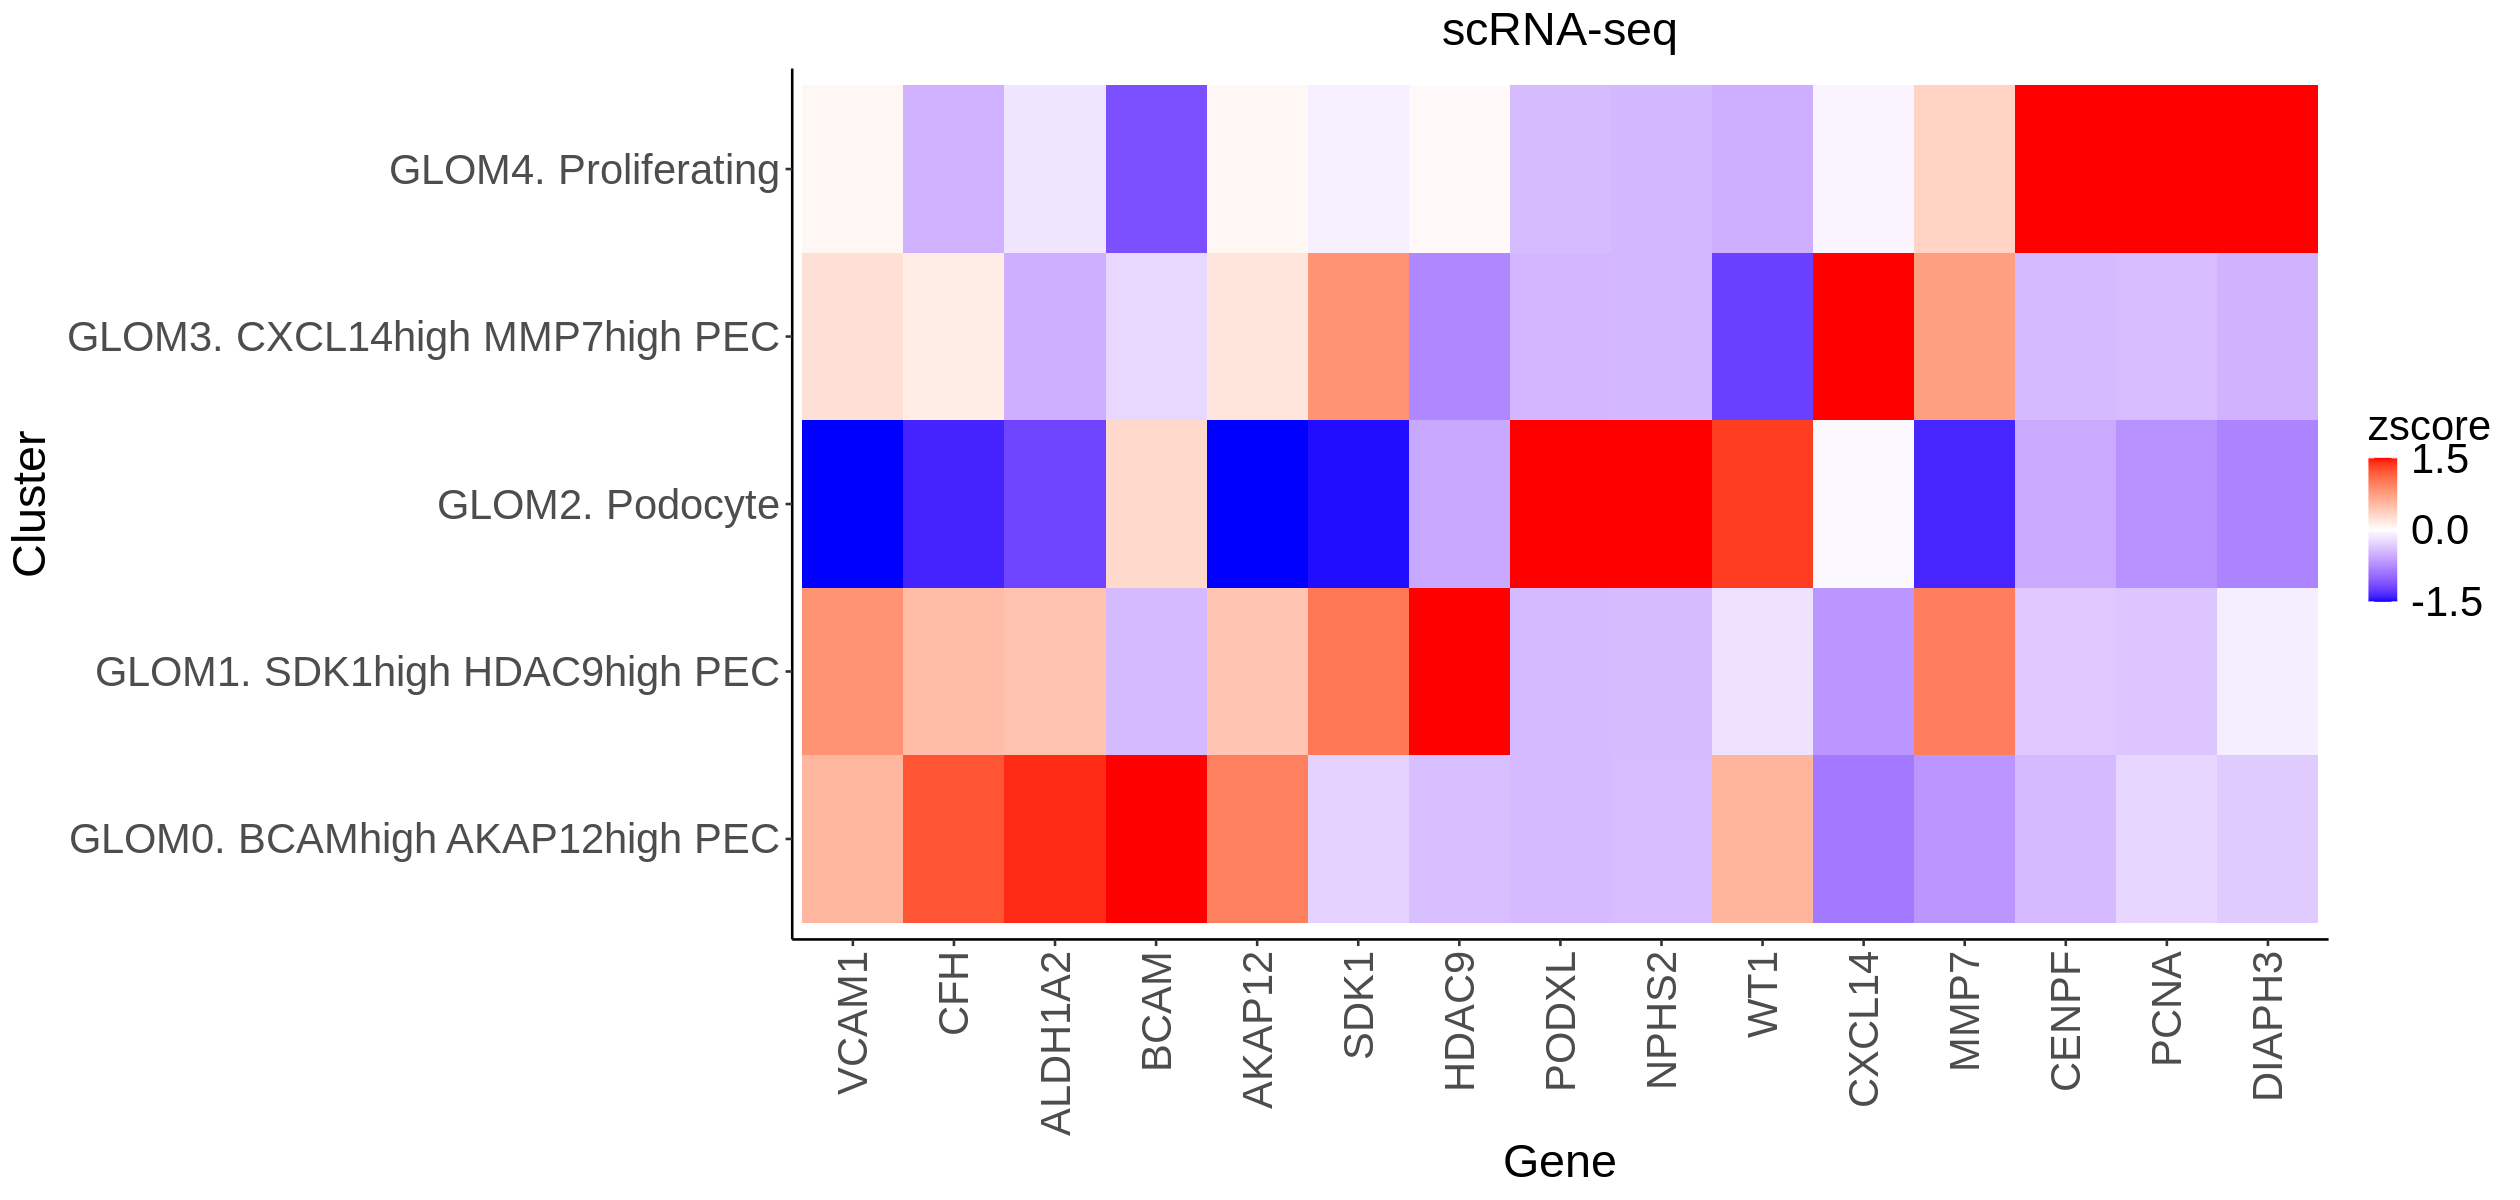

In [26]:
height = 10
width = 21
fig.size(height, width)


marker_heatmap = ggplot(dat, 
               aes(x = feature, y = group, 
                   fill = zscore)) + 
    geom_tile() + 
    theme_classic(base_size = tickfontsize) + 
    scale_fill_gradient2(low = "blue",
                         mid = "white",
                         high= "red", 
                         limits=c(-1.5, 1.5), 
                         oob = scales::squish, breaks = c(-1.5, 0, 1.5)) + 
    # scale_x_discrete(limits = marker_genes) + 
    # scale_y_discrete(limits = final_annotation$final_annotation) + 
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = .5),
          axis.text = element_text( size = labelfontsize+5),
          axis.title = element_text(size = labelfontsize+8), 
          plot.title = element_text(size = labelfontsize+8, hjust = 0.5), 
          legend.text = element_text(size = labelfontsize+5),
          legend.title = element_text(size = labelfontsize+5)

         ) + 
    labs(x = "Gene", y = "Cluster", title = title)

outplot = marker_heatmap
outplot

ggsave(paste0(figdir, 'glom_sc_heatmap_markers.png'), plot = outplot,  
       height = height, width = width, dpi = 500)
ggsave(paste0(figdir, 'glom_sc_heatmap_markers.pdf'), plot = outplot,  
       height = height, width = width, dpi = 500, device = cairo_pdf)

In [27]:
title = 'snRNA-seq'
dat_all = sn_plot_df %>% rename(percent = pct_in, zscore = avgExpr_scaled) 

# dat = dat_all %>% pivot_wider(id_cols = 'feature', names_from = 'group', 
#                     values_from = 'zscore') %>% as.data.frame
# rownames(dat) = dat$feature
# dat = dat %>% select(-feature)
# row.order = rownames(dat)[hclust(dist(dat))$order]
# col.order = colnames(dat)[hclust(dist(t(dat)))$order]
dat = dat_all
dat$group = factor(dat$group, levels = col.order)
dat$feature = factor(dat$feature, levels = row.order)
# dat = dat[!is.na(dat$group), ]

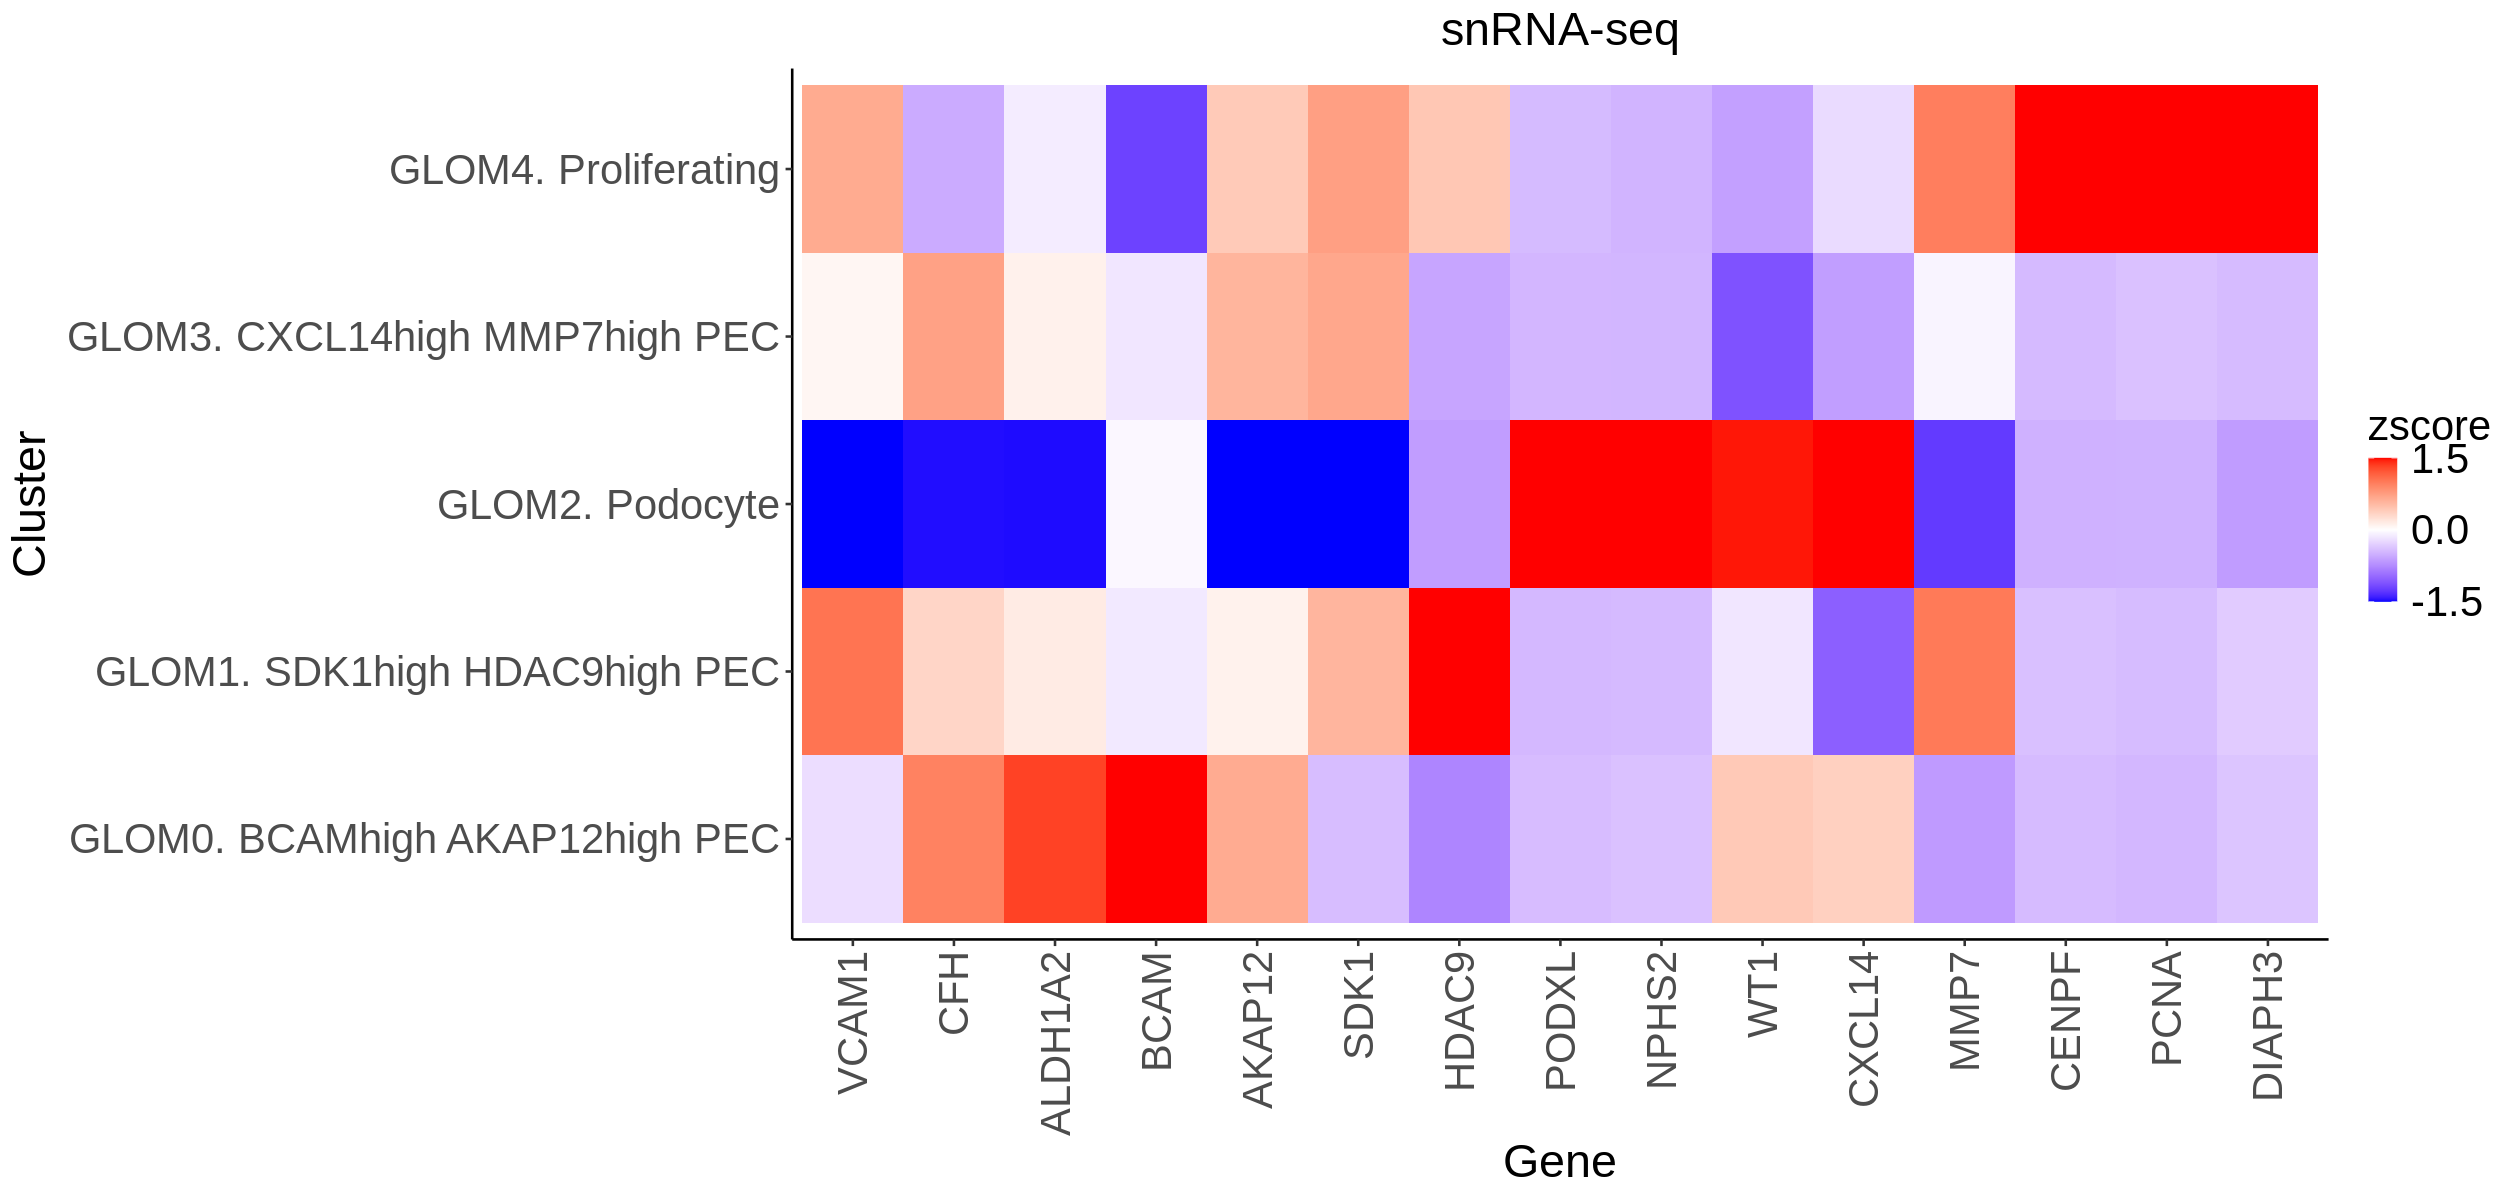

In [28]:
height = 10
width = 21
fig.size(height, width)


marker_heatmap = ggplot(dat, 
               aes(x = feature, y = group, 
                   fill = zscore)) + 
    geom_tile() + 
    theme_classic(base_size = tickfontsize) + 
    scale_fill_gradient2(low = "blue",
                         mid = "white",
                         high= "red", 
                         limits=c(-1.5, 1.5), 
                         oob = scales::squish, breaks = c(-1.5, 0, 1.5)) + 
    # scale_x_discrete(limits = marker_genes) + 
    # scale_y_discrete(limits = final_annotation$final_annotation) + 
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = .5),
          axis.text = element_text( size = labelfontsize+5),
          axis.title = element_text(size = labelfontsize+8), 
          plot.title = element_text(size = labelfontsize+8, hjust = 0.5), 
          legend.text = element_text(size = labelfontsize+5),
          legend.title = element_text(size = labelfontsize+5)

         ) + 
    labs(x = "Gene", y = "Cluster", title = title)

outplot = marker_heatmap
outplot

ggsave(paste0(figdir, 'glom_sn_heatmap_markers.png'), plot = outplot,  
       height = height, width = width, dpi = 500)
ggsave(paste0(figdir, 'glom_sn_heatmap_markers.pdf'), plot = outplot,  
       height = height, width = width, dpi = 500, device = cairo_pdf)

### Cluster Proportions in Matched Patients

In [29]:
glom_meta <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/tissue/glom_meta_qcd_harmony_umap_clusternames_11302023.rds')
glom_meta <- glom_meta  %>% 
                mutate(hres.0.20 = factor(hres.0.20, levels = as.character(0:4))) %>% 
                mutate(individual = str_split(sample, '_')) %>% 
                rowwise() %>% 
                mutate(individual = unlist(individual)[3]) 

sample_freq <- glom_meta %>% select(dataset, individual, hres.0.20) %>% 
                    table() %>% data.frame() %>% 
                    pivot_wider(names_from = "hres.0.20", values_from = Freq) 

ind_list <- glom_meta %>% select(dataset, individual) %>% 
                table() %>% data.frame() %>% 
                pivot_wider(names_from = 'dataset', values_from = "Freq") %>% filter(scRNAseq > 50 & snRNAseq > 50) %>% 
                pull(individual)

sample_freq_sc <- sample_freq %>% 
                    filter(individual %in% ind_list) %>% 
                    select(- individual) %>% 
                    filter(dataset == "scRNAseq") %>% 
                    select(-dataset) %>% colSums()

sample_freq_sn <- sample_freq %>% 
                    filter(individual %in% ind_list) %>% 
                    select(- individual) %>% 
                    filter(dataset == "snRNAseq") %>% 
                    select(-dataset) %>% colSums()
sample_freq <- data.frame(rep("a", 5))
sample_freq$sc_freq <- sample_freq_sc / sum(sample_freq_sc)
sample_freq$sc_se <- sqrt((sample_freq$sc_freq * (1 - sample_freq$sc_freq)) / sample_freq_sc)
sample_freq$sn_freq <- sample_freq_sn / sum(sample_freq_sn)
sample_freq$sn_se <- sqrt((sample_freq$sn_freq * (1 - sample_freq$sn_freq)) / sample_freq_sn)
sample_freq <- sample_freq[,- 1]
sample_freq$hres.0.20 <- as.character(seq(0, 4))

# fig.size(8, 8)

# max_val <- max(sample_freq[, c("sc_freq", "sn_freq")])

# ggplot(sample_freq, aes(x = sc_freq, y = sn_freq, color = hres.0.20)) + 
#     geom_abline(linetype = "dashed") +
#     ggsci::scale_color_frontiers() +
#     theme_classic() + 
#     geom_point(size = 4) + 
#     geom_linerange(aes(ymax = sn_freq+1.96*sn_se, 
#                         ymin = sn_freq-1.96*sn_se), alpha = 0.5) +
#     geom_linerange(aes(xmax = sc_freq+1.96*sc_se, 
#                         xmin = sc_freq-1.96*sc_se), alpha = 0.5) +
#     theme(legend.position = "none",
#           axis.text = element_text(size = 15),
#           axis.title = element_text(size = 18)) +
#     coord_cartesian(xlim = c(0, 0.4), ylim = c(0, 0.4)) + 
#     labs(x = "scRNAseq",
#          y = "snRNAseq")

In [30]:
r = cor(sample_freq$sc_freq, sample_freq$sn_freq)
pval = cor.test(sample_freq$sc_freq, sample_freq$sn_freq)$p.value

In [31]:
format(pval, format = 'e', digits = 3)

[1] "0.00919"

In [32]:
title = 'Glomerular'

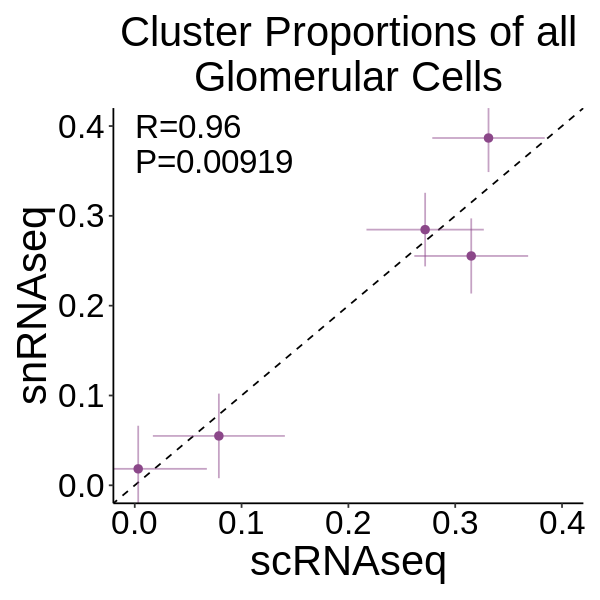

In [36]:
max_val <- max(sample_freq[, c("sc_freq", "sn_freq")])

p = ggplot(sample_freq, aes(x = sc_freq, y = sn_freq)) + 
    geom_abline(linetype = "dashed") +
    # scale_color_manual(values =as.vector(rev(palette36.colors(26)))) +
    theme_classic() + 
    geom_linerange(aes(ymax = sn_freq+1.96*sn_se, 
                        ymin = sn_freq-1.96*sn_se), alpha = 0.5, color = 'orchid4') +
    geom_linerange(aes(xmax = sc_freq+1.96*sc_se, 
                        xmin = sc_freq-1.96*sc_se), alpha = 0.5, color = 'orchid4') +
    geom_point(size = 2, color = 'orchid4') + 
    theme(legend.position = "none",
          axis.text = element_text(size = 15),
          axis.title = element_text(size = 18)) +
    coord_cartesian(xlim = c(0, 0.4), ylim = c(0, 0.4)) + 
    labs(x = "scRNAseq",
         y = "snRNAseq", title = paste0('Cluster Proportions of all\n', title, ' Cells'))+
    annotate("text", x = 0, y = 0.4, label = paste0('R=', round(r, 2)), hjust =0, 
         size =7)+
    annotate("text", x = 0, y = 0.36, label = paste0('P=', 
             format(pval, format = 'e', digits = 3)), hjust =0, 
         size =7)

p = p +theme(axis.text = element_text(color = "black", size = labelfontsize, vjust = 0.5),
           axis.title = element_text(size=labelfontsize+5, hjust = 0.5),
            legend.text = element_text(size = labelfontsize),
            legend.title = element_text(size = labelfontsize),
                plot.title = element_text(hjust = 0.5, size = labelfontsize+5),
                theme(text=element_text(family="Arial")),
                                    plot.margin = margin(10, 10, 10, 10))
height = 5
width = 5
fig.size(height, width)

outplot = p
outplot

ggsave(paste0(figdir, 'glom_scsn_cellfreqcorr.png'), plot = outplot,  
       height = height, width = width, dpi = 500)
ggsave(paste0(figdir, 'glom_scsn_cellfreqcorr.pdf'), plot = outplot,  
       height = height, width = width, dpi = 500, device = cairo_pdf)

In [37]:
cor.test(sample_freq$sc_freq, sample_freq$sn_freq)


	Pearson's product-moment correlation

data:  sample_freq$sc_freq and sample_freq$sn_freq
t = 6.0197, df = 3, p-value = 0.009188
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5176006 0.9975158
sample estimates:
      cor 
0.9610104 


In [ ]:
ggplot(glom_meta, 
       aes(x = as.factor(hres.0.20), y = as.numeric(doublet_score), fill = dataset)) + 
    geom_boxplot() + theme_classic(base_size = 20) + 
    labs(x = "cluster", y = "scrublet_score") + 
    scale_y_continuous(limits = c(0, 0.4))




ggplot(glom_meta, 
       aes(x = as.factor(hres.0.20), y = log(as.numeric(nCount_RNA)), fill = dataset)) + 
    geom_boxplot() + theme_classic(base_size = 20) +
    labs(x = "cluster", y = "log(Counts Per Cell)")




ggplot(glom_meta,
       aes(x = as.factor(hres.0.20), y = log(as.numeric(nFeature_RNA)), fill = dataset)) + 
    geom_boxplot() + theme_classic(base_size = 20) + 
    labs(x = "cluster", y = "log(Genes Per Cell)")

### GENE LIST FOR DE

In [2]:
glom_norm <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/tissue/GLOM_qcd_norm_12072023.rds')

In [3]:
gene_list <-  mclapply(rownames(glom_norm), check_5p_exp, glom_norm, mc.cores = 20)

In [7]:
genes <- data.frame(genes = do.call(rbind, gene_list))

In [9]:
saveRDS(genes, '/data/srlab/ssg34/SLE_kidney_v2/data/tissue/GLOM_5pgenes_de.rds')